In [50]:
data = pd.read_csv(r"both_neigbours.csv")
data=[data["Combo"][i] for i in range(len(data))]


['good communication skills',
 'retirement travel allowance',
 'excellent communication skills',
 'social support act',
 'further develop yourself',
 'strong communication skills',
 'working atmosphere within',
 'dutch language spoken',
 'english language spoken',
 'button experience professional',
 'thinking level at',
 'good social skills',
 'mbo level 3',
 'discount travel allowance',
 'building management systems',
 'technical service employee',
 'following strict requirements',
 'certificate driver license',
 'become enthusiastic about',
 'complex maintenance contract',
 'years education hbo',
 'opportunities travel allowance',
 'written communication skills',
 'become enthusiastic after',
 'advantage thorough knowledge',
 'valid driver license',
 'vocational education level',
 'most successful companies',
 'logistics service providers',
 'home care organization',
 'short communication lines',
 'running consignment services',
 'mind running consignment',
 'full travel allowance',


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(data)


In [52]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '02', '05', '06', '10', '100', '11', '12', '1400', '15', '150', '17', '1800', '1st', '20', '2000', '230000', '24', '2400', '247', '25', '300', '3000', '31', '3100', '32', '3200', '3300', '34', '3400', '360', '38', '3f', '3ig', '3pl', '40', '45', '50', '500', '5881000', '60', '689934023', '80', '90011400145001', '92', 'a1', 'aaa', 'aandacht', 'ab', 'abilities', 'ability', 'able', 'about', 'abroad', 'absenteeism', 'absolutely', 'academic', 'academy', 'acceptance', 'access', 'accessible', 'accessories', 'accomplished', 'according', 'accordingly', 'account', 'accountable', 'accountant', 'accounting', 'accounts', 'accuracy', 'accurate', 'accurately', 'achieve', 'achievement', 'achieving', 'acquired', 'acquisition', 'across', 'act', 'acting', 'action', 'actionable', 'actions', 'active', 'actively', 'activities', 'acumen', 'acute', 'ad', 'adapt', 'adaptability', 'adaptable', 'adapting', 'added', 'addiction', 'addition', 'additional', 'address', 'adjust', 'adjusted', 'adjustments', 'adl

In [53]:
print(X[0,])

  (0, 2557)	0.546560516602483
  (0, 553)	0.5696904732563621
  (0, 1238)	0.6137787601181464


In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

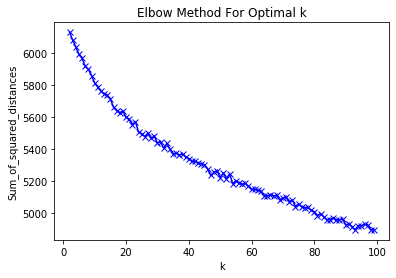

In [54]:
Sum_of_squared_distances = []
K = range(2,100)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
true_k = 25
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

Empty DataFrame
Columns: [title, cluster]
Index: []


Cluster: 0
Titles
Series([], )


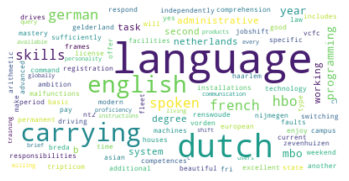

Cluster: 1
Titles
Series([], )


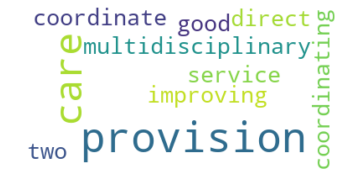

Cluster: 2
Titles
Series([], )


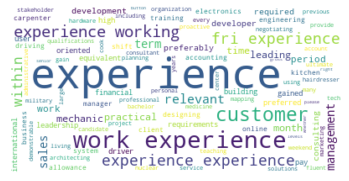

Cluster: 3
Titles
Series([], )


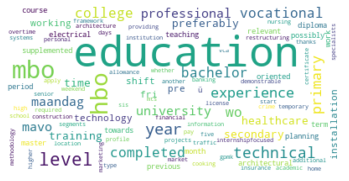

Cluster: 4
Titles
Series([], )


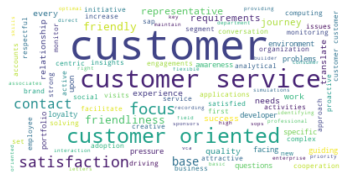

Cluster: 5
Titles
Series([], )


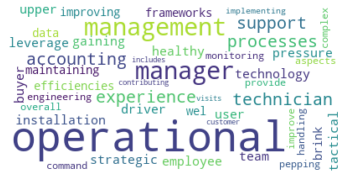

Cluster: 6
Titles
Series([], )


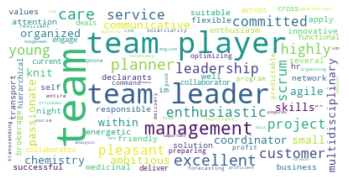

Cluster: 7
Titles
Series([], )


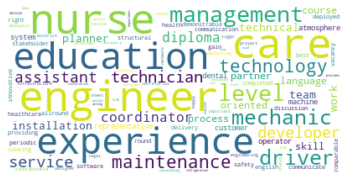

Cluster: 8
Titles
Series([], )


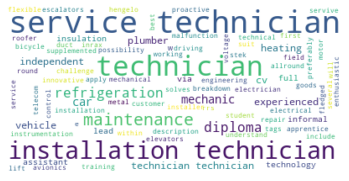

Cluster: 9
Titles
Series([], )


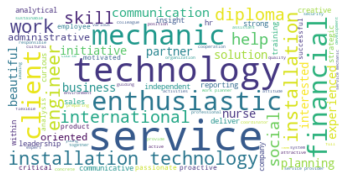

Cluster: 10
Titles
Series([], )


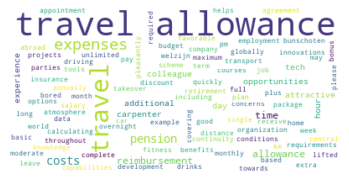

Cluster: 11
Titles
Series([], )


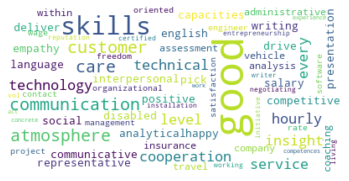

Cluster: 12
Titles
Series([], )


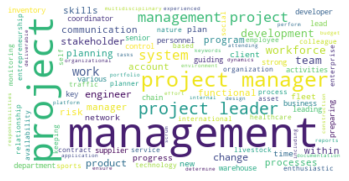

Cluster: 13
Titles
Series([], )


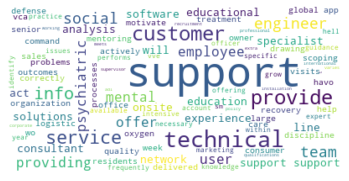

Cluster: 14
Titles
Series([], )


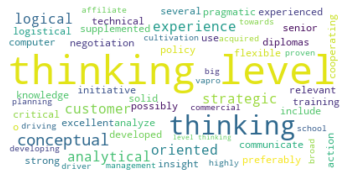

Cluster: 15
Titles
Series([], )


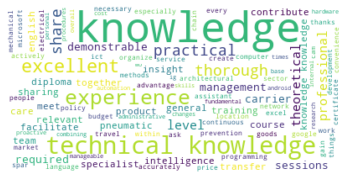

Cluster: 16
Titles
Series([], )


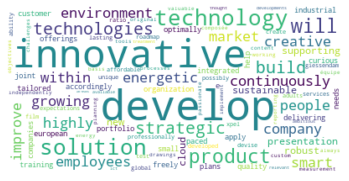

Cluster: 17
Titles
Series([], )


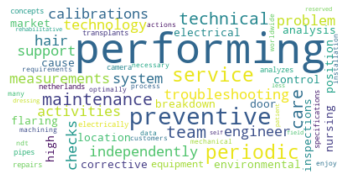

Cluster: 18
Titles
Series([], )


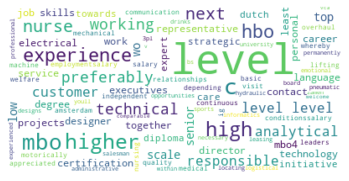

Cluster: 19
Titles
Series([], )


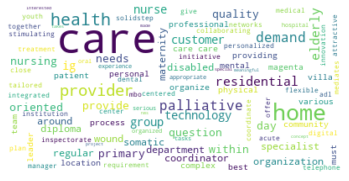

Cluster: 20
Titles
Series([], )


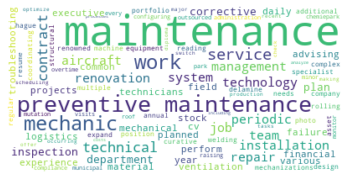

Cluster: 21
Titles
Series([], )


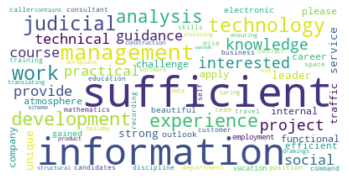

Cluster: 22
Titles
Series([], )


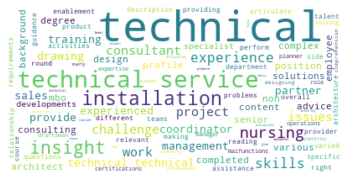

Cluster: 23
Titles
Series([], )


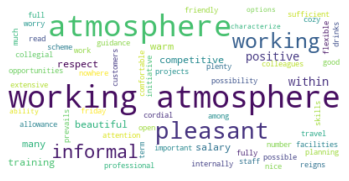

Cluster: 24
Titles
Series([], )


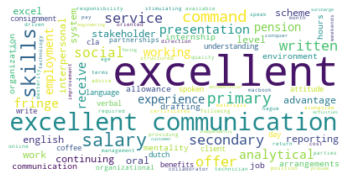

In [56]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':data}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()